In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [17]:
df = pd.read_parquet('../data/green_tripdata_2021-01.parquet')

In [18]:
#df = df[df.trip_type==2]

In [19]:
df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.total_seconds()/60

/home/pinnzonandres/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

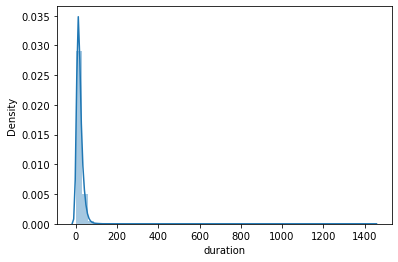

In [20]:
sns.distplot(df['duration'])


In [23]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [24]:
categorical  = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [25]:
df[categorical] = df[categorical].astype(str)

In [26]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [37]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [38]:
dv = DictVectorizer()

In [39]:
X_dv = dv.fit_transform(train_dicts)

In [42]:
target = 'duration'
y_train = df[target].values

In [43]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [45]:
lr = LinearRegression()
lr.fit(X_dv, y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_dv)

/home/pinnzonandres/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pinnzonandres/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

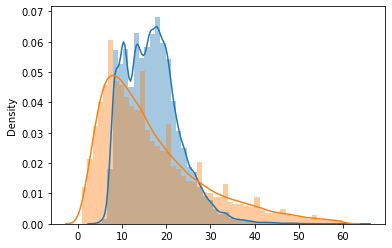

In [52]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'real')

In [56]:
RMSE = mean_squared_error(y_train, y_pred, squared = False)
RMSE

9.775464482998506